<a href="https://colab.research.google.com/github/VishalTyagi09/Finance-projects/blob/master/Exploratory_data_analysis_of_AnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Airbnb = pd.read_csv('/content/AB_NYC_2019.csv')

In [3]:
Airbnb.shape

(48895, 16)

In [4]:
Airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
Airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
Airbnb.drop(['id','host_name','last_review'],axis = 1,inplace=True)

In [8]:
Airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
Airbnb.fillna({'reviews_per_month':0},inplace=True)
Airbnb.fillna({'name':'Not mentioned'},inplace=True)

In [11]:
Airbnb.to_csv("Airbnb_data.csv")

In [10]:
Airbnb.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

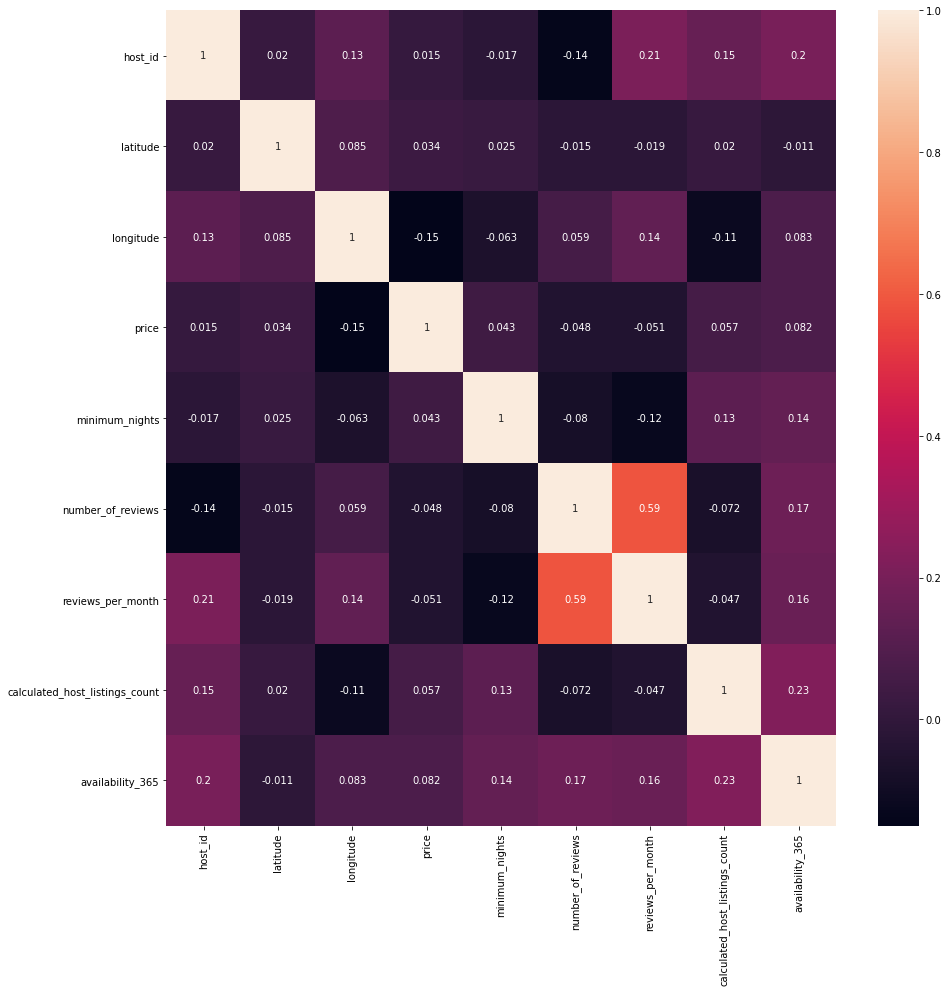

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Airbnb.corr(),annot=True)
plt.show()

In [ ]:
Airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

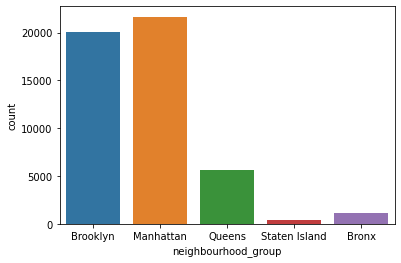

In [ ]:
sns.countplot(x='neighbourhood_group',data = Airbnb)

In [ ]:
Airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

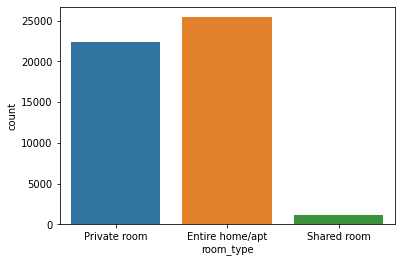

In [ ]:
sns.countplot(x='room_type',data=Airbnb)

In [ ]:
Airbnb['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [ ]:
print('Minimum no. of listing a particular host has:',Airbnb['calculated_host_listings_count'].min())
print('Maximum no. of listing a particular host has:',Airbnb['calculated_host_listings_count'].max())

Minimum no. of listing a particular host has: 1
Maximum no. of listing a particular host has: 327


In [ ]:
Airbnb['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

<Figure size 2160x2160 with 0 Axes>

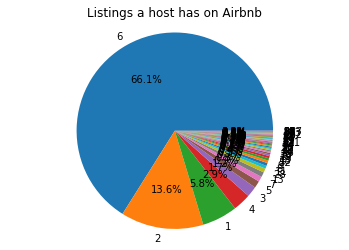

In [ ]:
labels = Airbnb['calculated_host_listings_count'].unique()
sizes = Airbnb['calculated_host_listings_count'].value_counts()*100
plt.figure(figsize=(30,30))
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,autopct = '%1.1f%%')
ax.axis('equal')
ax.set_title('Listings a host has on Airbnb')
plt.show()

In [ ]:
bronx = Airbnb['neighbourhood_group']=='Bronx'
Brooklyn = Airbnb['neighbourhood_group'] == 'Brooklyn'
Manhattan = Airbnb['neighbourhood_group'] == 'Manhattan'
Queens = Airbnb['neighbourhood_group'] == 'Queens'
staten_island = Airbnb['neighbourhood_group'] == 'Staten Island'

bronx_avg = Airbnb[bronx]['price'].mean()
brooklyn_avg = Airbnb[Brooklyn]['price'].mean()
manhattan_avg = Airbnb[Manhattan]['price'].mean()
queens_avg = Airbnb[Queens]['price'].mean()
statenisland_avg = Airbnb[staten_island]['price'].mean()
print('Average price in the Neighbourhood group')
print('Bronx:',bronx_avg)
print('Brooklyn:',brooklyn_avg)
print('Manhattan:',manhattan_avg)
print('Queens:',queens_avg)
print('Staten Island:',statenisland_avg)

Average price in the Neighbourhood group
Bronx: 87.4967919340055
Brooklyn: 124.38320732192598
Manhattan: 196.8758136743456
Queens: 99.51764913519237
Staten Island: 114.81233243967829


In [ ]:
private_room = Airbnb['room_type']=='Private room'
shared_room = Airbnb['room_type'] =='Shared room'
entire_home = Airbnb['room_type'] == 'Entire home/apt'
private_room_avg = Airbnb[private_room]['price'].mean()
shared_room_avg = Airbnb[private_room]['price'].mean()
entire_home_avg = Airbnb[entire_home]['price'].mean()
print('Average price of the Room types')
print('Private Room:',private_room_avg)
print('Shared Room:',shared_room_avg)
print('Entire Home/Apt:',entire_home_avg)

Average price of the Room types
Private Room: 89.78097285675894
Shared Room: 89.78097285675894
Entire Home/Apt: 211.79424613325986


In [ ]:
expensive = Airbnb[Airbnb['neighbourhood_group']=='Brooklyn'].sort_values(by = 'price',ascending =False)
expensive.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
4377,Film Location,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365
45666,Gem of east Flatbush,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,2,179
3774,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0.00,1,0
25825,Fulton 2,100069033,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,0.18,1,0
4345,NearWilliamsburg bridge 11211 BK,14908606,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0.16,1,363
26739,Broadway 1,153497815,Brooklyn,Bedford-Stuyvesant,40.68742,-73.91957,Entire home/apt,5000,2,8,0.38,1,0
4376,Photography Location,1177497,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0.09,11,365
46614,Northside Williamsburg Stunner,956324,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,0.00,1,365
43670,Beautiful private Brooklyn room with kitchenette,8748976,Brooklyn,Bedford-Stuyvesant,40.68807,-73.95426,Private room,4200,114,0,0.00,1,347


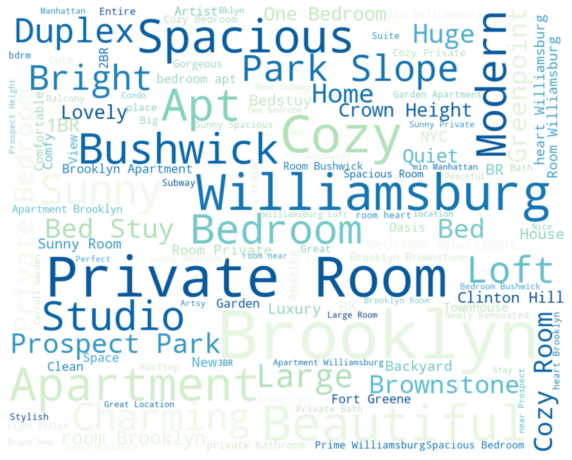

In [ ]:
airbnb_brooklyn = Airbnb[Airbnb['neighbourhood_group']=='Brooklyn']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_brooklyn['name']))
plt.figure(figsize=(10,15))
plt.imshow(word_cloud,interpolation='gaussian')
plt.axis('off')
plt.show()

In [ ]:
expensive2 = Airbnb[Airbnb['neighbourhood_group'] == 'Manhattan'].sort_values(by = 'price', ascending = False)
expensive2.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
29238,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
12342,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
40433,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
6530,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
29662,East 72nd Townhouse by (Hidden by Airbnb),156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146
42523,70' Luxury MotorYacht on the Hudson,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364
44034,3000 sq ft daylight photo studio,3750764,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.00,6,364
48043,Luxury TriBeCa Apartment at an amazing price,271248669,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.00,1,365
37194,Apartment New York \nHell’s Kitchens,35303743,Manhattan,Upper West Side,40.76835,-73.98367,Private room,6500,30,0,0.00,1,97


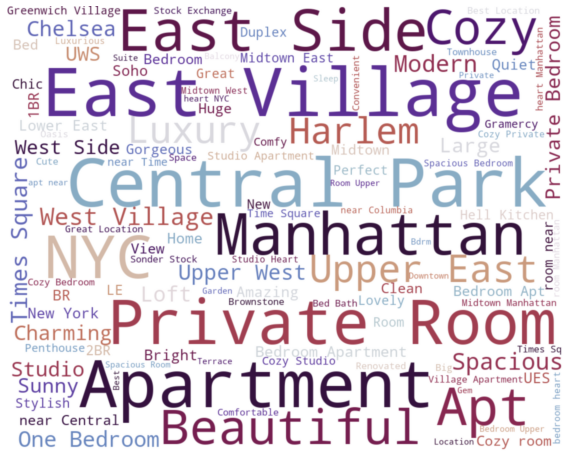

In [ ]:
airbnb_manhattan = Airbnb[Airbnb['neighbourhood_group'] == 'Manhattan']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_manhattan['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [ ]:
most_reviews = Airbnb.sort_values(by = 'number_of_reviews', ascending = False)
most_reviews.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
cheapest = Airbnb.sort_values(by = 'price', ascending = True)
cheapest.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25795,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
26866,Best Coliving space ever! Shared room.,101970559,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


In [ ]:
Expensive = Airbnb.sort_values(by = 'price', ascending = False)
Expensive.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
40433,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
12342,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
6530,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
4377,Film Location,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365
29662,East 72nd Townhouse by (Hidden by Airbnb),156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146
42523,70' Luxury MotorYacht on the Hudson,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364


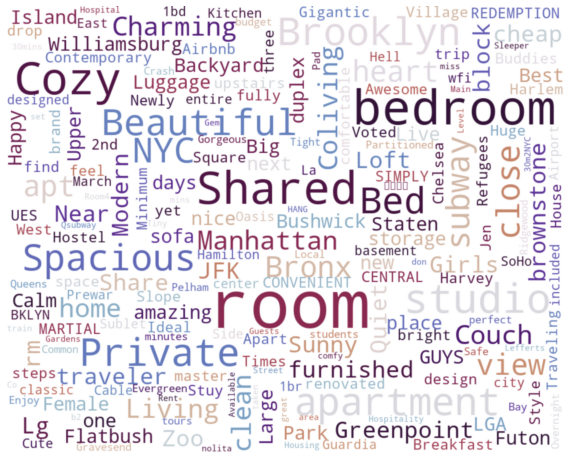

In [ ]:

cheapest = cheapest.head(100)
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(cheapest['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

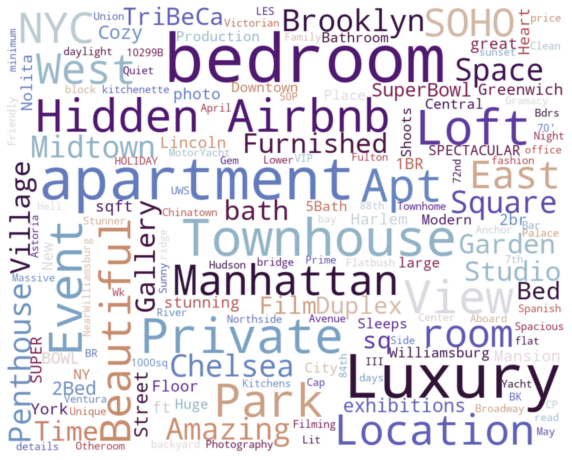

In [ ]:

Expensive = Expensive.head(100)
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(Expensive['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()